In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')


from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [45]:
chardatajeju_df = pd.read_excel('제주20년1월부터12월이상치+주소정리.xlsx')
chardatajeju_df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,충전시간,충전분,충전종료일자,충전시작시각,충전종료시각,시,구,도로명주소
0,23,제주,제주직할,아이린4차 아파트,완속01,3558,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,12.30,1,57,2020-01-01,2020-01-01 20:34:00,2020-01-01 22:31:00,제주특별자치도,제주시,이도일동 동광로 35
1,27,제주,제주직할,아라원신 아파트,급속01,3551,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,50.37,1,34,2020-01-01,2020-01-01 21:20:00,2020-01-01 22:54:00,제주특별자치도,제주시,아라일동 중앙로 578
2,43,제주,제주직할,방선문5차빌리지,완속01,3529,제주특별자치도 제주시 아라일동 아란1길 30,완속,7.0,14.36,2,13,2020-01-01,2020-01-01 20:51:00,2020-01-01 23:05:00,제주특별자치도,제주시,아라일동 아란1길 30
3,63,제주,제주직할,종합경기장,급속01,628,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,11.03,0,24,2020-01-01,2020-01-01 21:40:00,2020-01-01 22:05:00,제주특별자치도,제주시,서광로2길 24 (오라일동)
4,65,제주,제주직할,노형2차부영 아파트,완속02,3516,제주특별자치도 제주시 노형동 754-4,완속,7.0,9.44,1,48,2020-01-01,2020-01-01 21:41:00,2020-01-01 23:30:00,제주특별자치도,제주시,노형동 754-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248023,2056595,제주,제주직할,부웅크리스탈빌1차,완속1,6137,제주특별자치도 제주시 도남동 원남6길 55-1,완속,7.0,22.00,3,58,2020-12-03,2020-12-02 22:01,2020-12-03 1:59,제주특별자치도,제주시,도남동 원남6길 55-1
248024,2056598,제주,제주직할,아이린아파트,완속01,6658,제주특별자치도 제주시 서사로7길 1,완속,7.0,32.70,5,4,2020-12-03,2020-12-02 19:08,2020-12-03 0:13,제주특별자치도,제주시,서사로7길 1
248025,2056601,제주,서귀포,서귀포혁신LH1단지,완속01,5243,제주특별자치도 서귀포시 서호동 서호남로 92-15,완속,7.0,24.10,4,8,2020-12-03,2020-12-02 23:12,2020-12-03 3:20,제주특별자치도,서귀포시,서호동 서호남로 92-15
248026,2056611,제주,제주직할,노형지구중흥S클래스 아파트,완속02,3522,제주특별자치도 제주시 노형동 광평동로 66,완속,7.0,33.27,4,59,2020-12-03,2020-12-02 19:30,2020-12-03 0:30,제주특별자치도,제주시,노형동 광평동로 66


In [3]:
chardatajeju20_df = chardatajeju_df.loc[:, ['본부', '사업소', '충전소명', '충전기', '주소', '충전기구분', '충전용량', '구']]

In [4]:
chardatajeju20_df = chardatajeju20_df.drop_duplicates()
chardatajeju20_df

,본부,사업소,충전소명,충전기,주소,충전기구분,충전용량,구
0,제주,제주직할,아이린4차 아파트,완속01,제주특별자치도 제주시 이도일동 동광로 35,완속,7.0,제주시
1,제주,제주직할,아라원신 아파트,급속01,제주특별자치도 제주시 아라일동 중앙로 578,급속,50.0,제주시
2,제주,제주직할,방선문5차빌리지,완속01,제주특별자치도 제주시 아라일동 아란1길 30,완속,7.0,제주시
3,제주,제주직할,종합경기장,급속01,제주특별자치도 제주시 서광로2길 24 (오라일동),급속,50.0,제주시
4,제주,제주직할,노형2차부영 아파트,완속02,제주특별자치도 제주시 노형동 754-4,완속,7.0,제주시
...,...,...,...,...,...,...,...,...
234688,환경부,환경부,동녘도서관,급속02,제주특별자치도 제주시 구좌읍 일주동로 3132,급속,NaN,제주시
238881,환경부,환경부,제주특별자치도의회,급속01,제주특별자치도 제주시 문연로 13,급속,NaN,제주시
240399,환경부,환경부,동녘도서관,급속01,제주특별자치도 제주시 구좌읍 일주동로 3132,급속,NaN,제주시
243468,환경부,환경부,김녕119지역센터,급속01,제주특별자치도 제주시 구좌읍 김녕로 242,급속,NaN,제주시


In [5]:
print(chardatajeju20_df['구'].value_counts())

제주시     414
서귀포시    198
Name: 구, dtype: int64


In [6]:
chardatajeju20_df['구'].sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         제주시
1         제주시
2         제주시
3         제주시
4         제주시
         ... 
234688    제주시
238881    제주시
240399    제주시
243468    제주시
243484    제주시
Name: 구, Length: 612, dtype: object>

In [7]:
# 2020년 제주도 구별 충전소 가동률
np.round(chardatajeju20_df['구'].value_counts().div(612),2)

제주시     0.68
서귀포시    0.32
Name: 구, dtype: float64

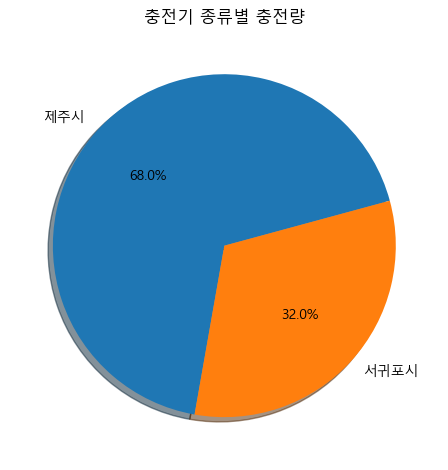

In [8]:
# 2020년 전기차 충전소 가동비율 그래프
ratio = [68,32]
labels = ['제주시', '서귀포시']

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('충전기 종류별 충전량')
plt.tight_layout()
plt.show()

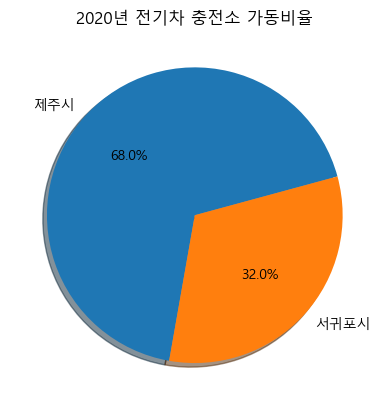

In [9]:
import matplotlib.pyplot as plt

ratio = [68,32]
labels = ['제주시', '서귀포시']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True)
plt.title('2020년 전기차 충전소 가동비율')
plt.show()


In [10]:
# 2020년 제주도 전기차 충전소 급속, 완속 충전기합
print(chardatajeju20_df['충전기구분'].value_counts())

급속    393
완속    219
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

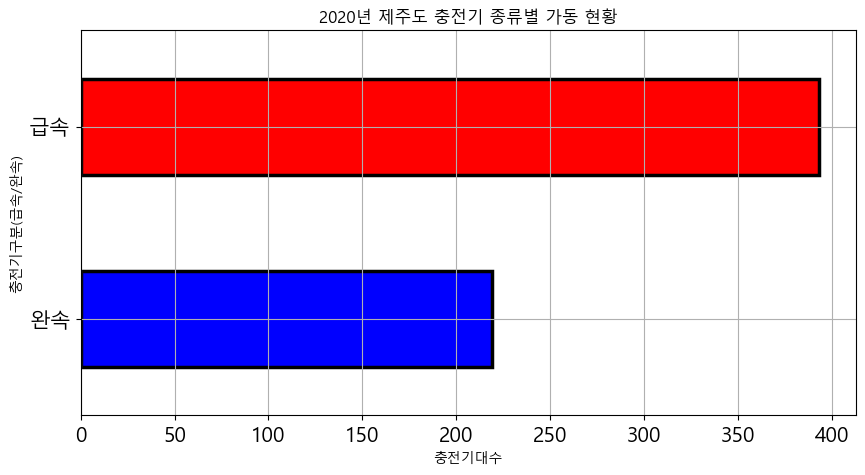

In [36]:
# 20년도 충전기 대수 가동 현황 총합 (완속, 급속)

chargerjeju20dist = pd.value_counts(chardatajeju20_df['충전기구분'].values, sort=True, ascending = True)
chargerjeju20dist.plot.barh()
chargerjeju20dist.plot.barh(grid=True, color = ['blue', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,5), fontsize=15)
plt.title('2020년 제주도 충전기 종류별 가동 현황')
plt.xlabel('충전기대수')
plt.ylabel('충전기구분(급속/완속)')

In [12]:
# 2020년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju20_df = chardatajeju20_df[['구', '충전기구분']]
chargerjeju20_df = chargerjeju20_df.groupby(["구", "충전기구분"]).size()
pd.DataFrame(chargerjeju20_df)

0
구    충전기구분     
서귀포시 급속     158
     완속      40
제주시  급속     235
     완속     179

Text(0, 0.5, '충전기대수')

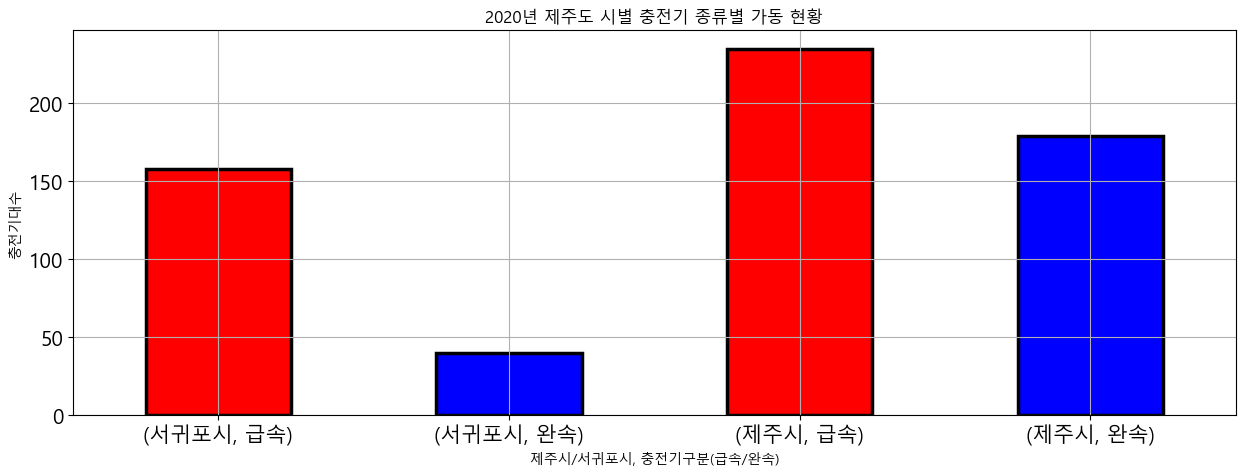

In [37]:
# 2020년도 제주도 자치구별 충전기 가동 현황을  시각화합니다. (구, 급속, 완속)

chargerjeju20_df.plot.bar()
chargerjeju20_df.plot.bar(grid=True, color = ['red', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(15,5), fontsize=15)
plt.xticks(rotation = 360)
plt.title('2020년 제주도 시별 충전기 종류별 가동 현황')
plt.xlabel('제주시/서귀포시, 충전기구분(급속/완속)')
plt.ylabel('충전기대수')

In [14]:
# 202년도 전기차충전소 사용빈도(제주시/서귀포시)
print(chardatajeju_df['구'].value_counts())

제주시     179734
서귀포시     68294
Name: 구, dtype: int64


In [39]:
chargecountjeju20_df

서귀포시     68294
제주시     179734
dtype: int64

Text(0, 0.5, '제주시/서귀포시')

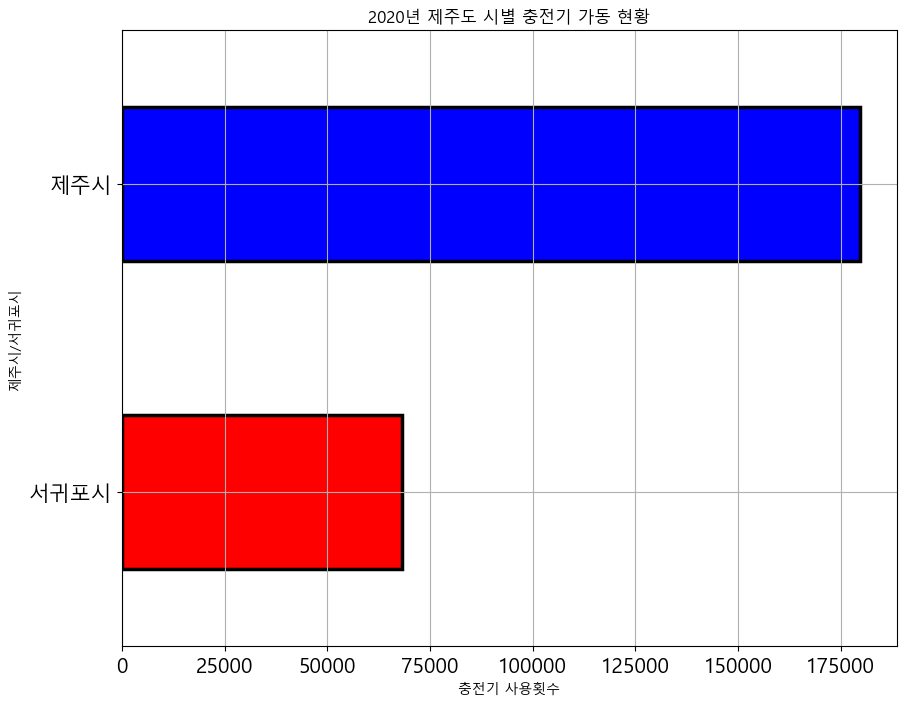

In [34]:
# 2020년도 제주도 전기차 충전소 사용 빈도 시각화

chargecountjeju20_df = pd.value_counts(chardatajeju_df['구'].values, sort=True, ascending = True)
chargecountjeju20_df.plot.barh()
chargecountjeju20_df.plot.barh(grid=True, color = ['red', 'blue'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2020년 제주도 시별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('제주시/서귀포시')

In [16]:
# 2020년도 전기차충전소 사용빈도(급속/완속)
print(chardatajeju_df['충전기구분'].value_counts())

급속    184046
완속     63982
Name: 충전기구분, dtype: int64


Text(0, 0.5, '충전기구분(급속/완속)')

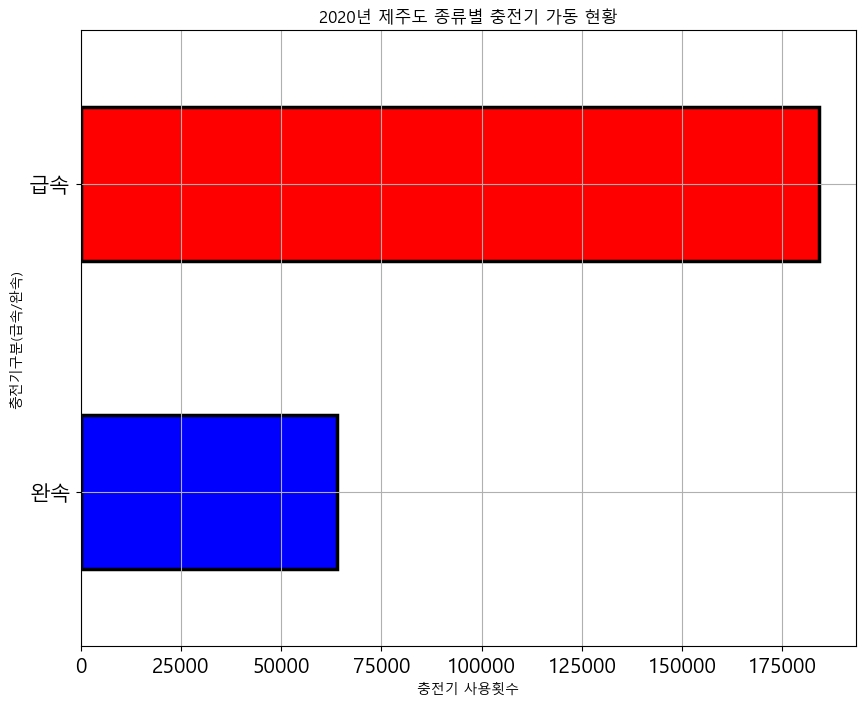

In [40]:
# 2020년도 제주도 전기차 충전소(급속/완속) 사용 빈도 시각화

chargetypecountjeju20_df = pd.value_counts(chardatajeju_df['충전기구분'].values, sort=True, ascending = True)
chargetypecountjeju20_df.plot.barh()
chargetypecountjeju20_df.plot.barh(grid=True, color = ['blue', 'red'], edgecolor = 'black', linewidth = 2.5, figsize=(10,8), fontsize=15)
plt.title('2020년 제주도 종류별 충전기 가동 현황')
plt.xlabel('충전기 사용횟수')
plt.ylabel('충전기구분(급속/완속)')

In [46]:
# 2020년도 제주도 자치구별, 충전기구분별 데이터 프레임을 추출합니다.

chargerjeju20202 = chardatajeju20_df[['구', '충전기구분']]
chargerjeju20202 = chargerjeju20202.groupby(["구", "충전기구분"]).value_counts().reset_index()